<table style="width: 100%;">
    <tr>
        <td><a href="https://ieb-chile.cl/en/" target="_blank"><img src="images/logo/IEB.png" style="height: 100px;"></a</td>
        <td></td>
        <td><img src="images/logo/Biodata.png" style="height: 100px;"></td>
    </tr>
</table>

| ![IEB-Logo](images/logo/IEB.png) | ![Biodata](images/logo/Biodata.png) |
|:--------------------------------:|:------------------------------------|


# GBIF Chile Species

In this notebooks we extract the species found in Chile according to the [GBIF species](https://www.gbif.org/species/search) and the [GBIF ocurrence](https://www.gbif.org/occurrence/search) query done in the [GBIF platform](https://www.gbif.org/).

Due to the size of this query, the package PyDwCA is not used. However, this notebook is presented because the list of chilean species is needed in other notebook examples.

Import libraries:

In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
from matplotlib_venn import venn2

In [2]:
os.makedirs("data", exist_ok=True)

## Downloading Data

The data was obtained through queries in the GBIF platform.

### Occurrence

The ocurrence list query is available at [https://api.gbif.org/v1/occurrence/download/request/0018326-240626123714530.zip](https://api.gbif.org/v1/occurrence/download/request/0018326-240626123714530.zip).

And the DOI PURL, for cite purpose, is: [ https://doi.org/10.15468/dl.cghs7y](https://doi.org/10.15468/dl.cghs7y).

In [3]:
!wget https://api.gbif.org/v1/occurrence/download/request/0018326-240626123714530.zip -O data/chile-dwca.zip

--2024-07-23 19:55:12--  https://api.gbif.org/v1/occurrence/download/request/0018326-240626123714530.zip
Resolving api.gbif.org (api.gbif.org)... 130.225.43.2
Connecting to api.gbif.org (api.gbif.org)|130.225.43.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://occurrence-download.gbif.org/occurrence/download/request/0018326-240626123714530.zip [following]
--2024-07-23 19:55:13--  https://occurrence-download.gbif.org/occurrence/download/request/0018326-240626123714530.zip
Resolving occurrence-download.gbif.org (occurrence-download.gbif.org)... 130.225.43.36
Connecting to occurrence-download.gbif.org (occurrence-download.gbif.org)|130.225.43.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2792833084 (2.6G) [application/octet-stream]
Saving to: ‘data/chile-dwca.zip’

data/chile-dwca.zip 100%[===================>]   2.60G  10.6MB/s    in 4m 27s  

2024-07-23 19:59:41 (9.98 MB/s) - ‘data/chile-dwca.zip’ saved [2792833084/2

In [4]:
!rm -Rf data/chile-dwca
!unzip data/chile-dwca.zip -d data/chile-dwca

Archive:  data/chile-dwca.zip
  inflating: data/chile-dwca/rights.txt  
  inflating: data/chile-dwca/citations.txt  
  inflating: data/chile-dwca/dataset/001e060d-ac3b-46d9-955f-50fba13102d2.xml  
  inflating: data/chile-dwca/dataset/0031102a-1f65-422c-987f-0c370fc5f518.xml  
  inflating: data/chile-dwca/dataset/005eb8d8-ed94-41be-89cf-e3115a9058e4.xml  
  inflating: data/chile-dwca/dataset/007f624a-2029-44d9-8052-4b4fe349c0e2.xml  
  inflating: data/chile-dwca/dataset/009a76f6-0960-4a56-a116-63991e6bb037.xml  
  inflating: data/chile-dwca/dataset/00b558f7-f916-4658-b770-9590e0836283.xml  
  inflating: data/chile-dwca/dataset/00d636a3-e132-44b6-ae77-0b1cadb3e59e.xml  
  inflating: data/chile-dwca/dataset/00ed18ea-4993-4809-a656-62363baa4808.xml  
  inflating: data/chile-dwca/dataset/0102d2af-7f21-4238-b1fa-cbbeeee60423.xml  
  inflating: data/chile-dwca/dataset/01420ffc-86b8-405e-a3ec-6c2ad3029fb3.xml  
  inflating: data/chile-dwca/dataset/0150c79f-35f3-447f-a40f-24ee9f1fb9d3.xml  
  i

### Species

The species list query is available at [https://api.gbif.org/v1/occurrence/download/request/0018523-240626123714530.zip](https://api.gbif.org/v1/occurrence/download/request/0018523-240626123714530.zip).

And the DOI PURL, for cite purpose, is: [https://doi.org/10.15468/dl.haaq9a](https://doi.org/10.15468/dl.haaq9a).

In [5]:
!wget https://api.gbif.org/v1/occurrence/download/request/0018523-240626123714530.zip -O data/chilean-species.zip

--2024-07-23 20:01:52--  https://api.gbif.org/v1/occurrence/download/request/0018523-240626123714530.zip
Resolving api.gbif.org (api.gbif.org)... 130.225.43.2
Connecting to api.gbif.org (api.gbif.org)|130.225.43.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://occurrence-download.gbif.org/occurrence/download/request/0018523-240626123714530.zip [following]
--2024-07-23 20:01:52--  https://occurrence-download.gbif.org/occurrence/download/request/0018523-240626123714530.zip
Resolving occurrence-download.gbif.org (occurrence-download.gbif.org)... 130.225.43.36
Connecting to occurrence-download.gbif.org (occurrence-download.gbif.org)|130.225.43.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6135396 (5.9M) [application/octet-stream]
Saving to: ‘data/chilean-species.zip’

data/chilean-specie 100%[===================>]   5.85M  2.72MB/s    in 2.1s    

2024-07-23 20:01:55 (2.72 MB/s) - ‘data/chilean-species.zip’ saved [61353

In [6]:
!rm -Rf data/chilean-species
!unzip data/chilean-species.zip -d data/chilean-species

Archive:  data/chilean-species.zip
  inflating: data/chilean-species/0018523-240626123714530.csv  


## Checking species

Due its size, the `occurrence.txt` file is going to be read line by line to avoid loading the whole file to memory.

Getting the header for

In [7]:
with open("data/chile-dwca/occurrence.txt", "r") as occurrence_file:
    for line in occurrence_file:
        cells = line.split("\t")
        for i, cell in enumerate(cells):
            print(f"{i:03d}: {cell}")
        break

000: gbifID
001: accessRights
002: bibliographicCitation
003: language
004: license
005: modified
006: publisher
007: references
008: rightsHolder
009: type
010: institutionID
011: collectionID
012: datasetID
013: institutionCode
014: collectionCode
015: datasetName
016: ownerInstitutionCode
017: basisOfRecord
018: informationWithheld
019: dataGeneralizations
020: dynamicProperties
021: occurrenceID
022: catalogNumber
023: recordNumber
024: recordedBy
025: recordedByID
026: individualCount
027: organismQuantity
028: organismQuantityType
029: sex
030: lifeStage
031: reproductiveCondition
032: caste
033: behavior
034: vitality
035: establishmentMeans
036: degreeOfEstablishment
037: pathway
038: georeferenceVerificationStatus
039: occurrenceStatus
040: preparations
041: disposition
042: associatedOccurrences
043: associatedReferences
044: associatedSequences
045: associatedTaxa
046: otherCatalogNumbers
047: occurrenceRemarks
048: organismID
049: organismName
050: organismScope
051: associ

Selecting the columns to be used:
- occurrenceID
- decimalLatitude
- decimalLongitude
- taxonID
- scientificNameID
- acceptedNameUsageID
- parentNameUsageID
- originalNameUsageID
- taxonConceptID
- scientificName
- acceptedNameUsage
- parentNameUsage
- originalNameUsage
- higherClassification
- kingdom
- taxonRank
- taxonKey
- acceptedTaxonKey

In [8]:
target_columns = [
    "occurrenceID", "decimalLatitude", "decimalLongitude",
    "taxonID", "scientificNameID", "acceptedNameUsageID",
    "parentNameUsageID", "originalNameUsageID",
    "taxonConceptID", "scientificName", "acceptedNameUsage",
    "parentNameUsage", "originalNameUsage",
    "higherClassification", "kingdom", "taxonRank",
    "taxonKey", "acceptedTaxonKey"
]

In [9]:
selected_data = list()
with open("data/chile-dwca/occurrence.txt", "r") as occurrence_file:
    reading_header = True
    target_indexes = list()
    for line in tqdm(occurrence_file, desc="Reading lines", unit="line"):
        cells = line.split("\t")
        if reading_header:
            for target in target_columns:
                target_indexes.append(cells.index(target))
            reading_header = False
        else:
            row = list()
            for target in target_indexes:
                row.append(cells[target])
            selected_data.append(row.copy())
species_occurrence = pd.DataFrame(selected_data, columns=target_columns)
species_occurrence

Reading lines: 11170183line [03:24, 54498.17line/s]


,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,taxonKey,acceptedTaxonKey
0,URN:catalog:CLO:EBIRD:OBS183344571,-32.711334,-71.48894,,,2489208,,,avibase-DFFD116E,"Pygochelidon cyanoleuca (Vieillot, 1817)",,,,,Animalia,SPECIES,2489207,2489208
1,URN:catalog:CLO:EBIRD:OBS264025607,-35.319748,-72.40518,,,2478271,,,avibase-F5BEB645,"Colaptes pitius (Molina, 1782)",,,,,Animalia,SPECIES,2478271,2478271
2,URN:catalog:CLO:EBIRD:OBS289151631,-33.35204,-70.31293,,,2484396,,,avibase-AA779804,"Molothrus bonariensis (Gmelin, 1789)",,,,,Animalia,SPECIES,2484396,2484396
3,URN:catalog:CLO:EBIRD_CL:OBS328209534,-29.933924,-71.33583,,,2485053,,,avibase-1B10F1B4,"Cinclodes nigrofumosus (Orbigny & Lafresnaye, ...",,,,,Animalia,SPECIES,2485053,2485053
4,URN:catalog:CLO:EBIRD:OBS331693335,-33.6198,-71.62754,,,2481285,,,avibase-3F9E1C51,"Thalasseus elegans (Gambel, 1849)",,,,,Animalia,SPECIES,2481285,2481285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11170177,https://observation.org/observation/270874409,-45.341479,-73.662808,,,5739277,,,,"Ardenna grisea (J.F.Gmelin, 1789)",,,,Animalia|Procellariidae,Animalia,SPECIES,8249990,5739277
11170178,https://observation.org/observation/292937076,-33.443743,-70.663038,,,2486493,,,,"Phytotoma rara Molina, 1782",,,,Animalia|Cotingidae,Animalia,SPECIES,2486493,2486493
11170179,https://observation.org/observation/175336280,-41.929729,-74.031631,,,6175727,,,,"Megaceryle torquata stellata (Meyen, 1834)",,,,Animalia|Alcedinidae,Animalia,SUBSPECIES,6175727,6175727
11170180,https://observation.org/observation/143878255,-32.943611,-71.677094,,,2481427,,,,"Pelecanoides garnotii (Lesson, 1828)",,,,Animalia|Procellariidae,Animalia,SPECIES,2481427,2481427


In [10]:
for kingdom in np.unique(species_occurrence["kingdom"]):
    species_occurrence[species_occurrence["kingdom"] == kingdom].to_csv(
        f"data/species_ocurrence_{kingdom}.csv",
        index=False, header=True
    )

In [11]:
os.makedirs("data/summaries", exist_ok=True)

In [12]:
summary = pd.DataFrame(species_occurrence.groupby("kingdom").size(), columns=["Occurrences"])
total = summary.sum()
summary.loc["Total"] = total
summary.to_csv("data/summaries/occurrence_per_kingdom.csv")
summary

,Occurrences
kingdom,
Animalia,10296244
Archaea,1715
Bacteria,112494
Chromista,80689
Fungi,111683
Plantae,543027
Protozoa,7060
Viruses,4732
incertae sedis,12538


Selecting all species on occurrence:

In [13]:
agg_columns = dict()
for col in target_columns:
    if col != "taxonKey":
        agg_columns[col] = "first"
species_found = species_occurrence.groupby("taxonKey").agg(agg_columns).reset_index()
species_found["count"] = species_occurrence.groupby("taxonKey").size().values
species_found

,taxonKey,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,acceptedTaxonKey,count
0,0,9966600,-40.66529,-72.1732,669461,,,,,,incertae sedis,,,,,incertae sedis,KINGDOM,,12267
1,1,http://coldb.mnhn.fr/catalognumber/mnhn/f/f630...,,,,,1,,,,Animalia,,,,,Animalia,KINGDOM,1,6524
2,1000017,CP063144,,,ASV:ecf225140ac79bbbfde3cfc98bb2c6af,,1000017,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:5...,Thermosphaera aggregans_A,,,,,Archaea,SPECIES,1000017,1
3,10000278,BOTWC593-10,-18.435,-69.512,BOLD:AAU3287,,10000278,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAU3287,,,,,Animalia,UNRANKED,10000278,2
4,1000050,JAFKPG010000000,-22.3667,-67.9833,,,1000050,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:2288,"Sulfolobus Brock et al., 1972",,,,,Archaea,GENUS,1000050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70515,9997883,GWOSL852-11,-42.3168,-72.3258,BOLD:ABA9674,,9997883,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:ABA9674,,,,,Animalia,UNRANKED,9997883,1
70516,9998025,GACO170-19,-39.7,-72.326,BOLD:AAX3984,,9998025,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAX3984,,,,,Animalia,UNRANKED,9998025,2
70517,9998158,MGYA00205363_Bacteria::Proteobacteria:Alphapro...,-44.588,-72.725,,,9998158,,,,Pelagibacteraceae,,,,,Bacteria,FAMILY,9998158,417
70518,9998182,GBMLG6512-08,,,BOLD:AAA2369,,9998182,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAA2369,,,,,Animalia,UNRANKED,9998182,1


In [14]:
sp_summary = pd.DataFrame(species_found.groupby("kingdom").size(), columns=["Species"])
total = sp_summary.sum()
sp_summary.loc["Total"] = total
sp_summary.to_csv("data/summaries/species_per_kindom.csv")
sp_summary

,Species
kingdom,
Animalia,29007
Archaea,129
Bacteria,3367
Chromista,3038
Fungi,9925
Plantae,24411
Protozoa,507
Viruses,100
incertae sedis,36


In [15]:
pd.merge(sp_summary, summary, left_index=True, right_index=True).to_csv("data/summaries/summary_per_kingdom.csv")
pd.merge(sp_summary, summary, left_index=True, right_index=True)

,Species,Occurrences
kingdom,,
Animalia,29007,10296244
Archaea,129,1715
Bacteria,3367,112494
Chromista,3038,80689
Fungi,9925,111683
Plantae,24411,543027
Protozoa,507,7060
Viruses,100,4732
incertae sedis,36,12538


Filtering by kingdom:
- Animalia
- Plantae
- Fungi

In [16]:
kingdoms = ["Animalia", "Plantae", "Fungi"]

In [17]:
species_occurrence = species_occurrence[
    (~species_occurrence["scientificName"].duplicated()) &
    (species_occurrence["kingdom"].isin(kingdoms))
]
species_occurrence

,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,taxonKey,acceptedTaxonKey
0,URN:catalog:CLO:EBIRD:OBS183344571,-32.711334,-71.48894,,,2489208,,,avibase-DFFD116E,"Pygochelidon cyanoleuca (Vieillot, 1817)",,,,,Animalia,SPECIES,2489207,2489208
1,URN:catalog:CLO:EBIRD:OBS264025607,-35.319748,-72.40518,,,2478271,,,avibase-F5BEB645,"Colaptes pitius (Molina, 1782)",,,,,Animalia,SPECIES,2478271,2478271
2,URN:catalog:CLO:EBIRD:OBS289151631,-33.35204,-70.31293,,,2484396,,,avibase-AA779804,"Molothrus bonariensis (Gmelin, 1789)",,,,,Animalia,SPECIES,2484396,2484396
3,URN:catalog:CLO:EBIRD_CL:OBS328209534,-29.933924,-71.33583,,,2485053,,,avibase-1B10F1B4,"Cinclodes nigrofumosus (Orbigny & Lafresnaye, ...",,,,,Animalia,SPECIES,2485053,2485053
4,URN:catalog:CLO:EBIRD:OBS331693335,-33.6198,-71.62754,,,2481285,,,avibase-3F9E1C51,"Thalasseus elegans (Gambel, 1849)",,,,,Animalia,SPECIES,2481285,2481285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11169679,KT722403,,,ASV:7f7ad0a6950009d34484ba2074ca36f8,,2265855,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:1...,"Hydractinia Van Beneden, 1844",,,,,Animalia,GENUS,2265855,2265855
11169681,KT981909,-42.15,-72.59,ASV:2f68bd68fd87f461ce8b2d6a8586a054,,5185697,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:2...,"Coryne eximia Allman, 1859",,,,,Animalia,SPECIES,5185697,5185697
11169895,KY462506,,,ASV:05e2c91a3cd4e27e6889d0ef79d3314e,,2526775,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:1...,Psilocybe (Fr.) P.Kumm.,,,,,Fungi,GENUS,2526775,2526775
11170088,,-51.137138,-72.979431,,,2827046,,,,Encyclia thrombodes (Rchb.f.) Schltr.,,,,,Plantae,SPECIES,2827046,2827046


Species found in GBIF species query:

In [18]:
species_species = pd.read_csv("data/chilean-species/0018523-240626123714530.csv", delimiter="\t", dtype=str)
species_species = species_species[species_species["kingdom"].isin(kingdoms)]  # Filter by kingdom
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,359,Mammalia,359,Mammalia,27,CLASS,ACCEPTED,Animalia,1,Chordata,...,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE
2,1161,Pseudoscorpiones,1161,Pseudoscorpiones,99,ORDER,ACCEPTED,Animalia,1,Arthropoda,...,367,Pseudoscorpiones,1161,NaN,NaN,NaN,NaN,NaN,NaN,NE
3,2390,Scrophulariaceae,2390,Scrophulariaceae,65,FAMILY,ACCEPTED,Plantae,6,Tracheophyta,...,220,Lamiales,408,Scrophulariaceae,2390,NaN,NaN,NaN,NaN,NE
5,4334,Apidae,4334,Apidae,59,FAMILY,ACCEPTED,Animalia,1,Arthropoda,...,216,Hymenoptera,1457,Apidae,4334,NaN,NaN,NaN,NaN,NE
6,5538,Astropectinidae,5538,Astropectinidae,1,FAMILY,ACCEPTED,Animalia,1,Echinodermata,...,214,Paxillosida,808,Astropectinidae,5538,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70517,11813786,SH1303572.09FU,11813786,SH1303572.09FU,3,UNRANKED,ACCEPTED,Fungi,5,Basidiomycota,...,186,Agaricales,1499,Cortinariaceae,4172,Cortinarius,2524960,Cortinarius tristis,3349062,NaN
70518,11880087,SH1103608.09FU,11880087,SH1103608.09FU,6,UNRANKED,ACCEPTED,Fungi,5,Ascomycota,...,183,Venturiales,7446671,Venturiaceae,8317,NaN,NaN,NaN,NaN,NaN
70520,12288284,"Tindaria sulcata (Gould, 1852)",7700358,"Nucula sulcata (Gould, 1852)",4,SPECIES,SYNONYM,Animalia,1,Mollusca,...,137,Nuculanida,9405932,Bathyspinulidae,4374777,Tindariopsis,4305288,Nucula sulcata,7700358,NE
70521,12291971,Ulota fuegiana subsp. darwinii (Mitt.) Malta,2671954,Ulota fuegiana Mitt.,19,SUBSPECIES,SYNONYM,Plantae,6,Bryophyta,...,327,Orthotrichales,1341,Orthotrichaceae,4668,Ulota,2671910,Ulota fuegiana,2671954,NaN


Check duplicates

In [19]:
species_species[species_species["taxonKey"].duplicated(keep=False)]

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
27612,2569865,"Lecidea Ach., 1803",2569865,"Lecidea Ach., 1803",1,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Lecideales,10848190,Lecideaceae,8296,Lecidea,2569865,Lecidea endochlora,NaN,NaN
34949,2569815,"Ochrolechia A.Massal., 1852",2569815,"Ochrolechia A.Massal., 1852",2,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Ochrolechiaceae,4114,Ochrolechia,2569815,Ochrolechia blandior,NaN,NaN
40121,2599923,"Pertusaria DC., 1805",2599923,"Pertusaria DC., 1805",230,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Pertusariaceae,4113,Pertusaria,2599923,NaN,NaN,NaN
43945,2599923,"Pertusaria DC., 1805",2599923,"Pertusaria DC., 1805",1,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Pertusariaceae,4113,Pertusaria,2599923,Pertusaria obvelata,NaN,NaN
45439,2569815,"Ochrolechia A.Massal., 1852",2569815,"Ochrolechia A.Massal., 1852",103,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Ochrolechiaceae,4114,Ochrolechia,2569815,NaN,NaN,NaN
53679,2569865,"Lecidea Ach., 1803",2569865,"Lecidea Ach., 1803",256,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Lecideales,10848190,Lecideaceae,8296,Lecidea,2569865,NaN,NaN,NaN


Delete `GENUS` with species declares

In [20]:
species_species = species_species[
    ~(
        (species_species["taxonKey"].duplicated(keep=False)) &
        (pd.isna(species_species["species"]))
    )
]
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,359,Mammalia,359,Mammalia,27,CLASS,ACCEPTED,Animalia,1,Chordata,...,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE
2,1161,Pseudoscorpiones,1161,Pseudoscorpiones,99,ORDER,ACCEPTED,Animalia,1,Arthropoda,...,367,Pseudoscorpiones,1161,NaN,NaN,NaN,NaN,NaN,NaN,NE
3,2390,Scrophulariaceae,2390,Scrophulariaceae,65,FAMILY,ACCEPTED,Plantae,6,Tracheophyta,...,220,Lamiales,408,Scrophulariaceae,2390,NaN,NaN,NaN,NaN,NE
5,4334,Apidae,4334,Apidae,59,FAMILY,ACCEPTED,Animalia,1,Arthropoda,...,216,Hymenoptera,1457,Apidae,4334,NaN,NaN,NaN,NaN,NE
6,5538,Astropectinidae,5538,Astropectinidae,1,FAMILY,ACCEPTED,Animalia,1,Echinodermata,...,214,Paxillosida,808,Astropectinidae,5538,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70517,11813786,SH1303572.09FU,11813786,SH1303572.09FU,3,UNRANKED,ACCEPTED,Fungi,5,Basidiomycota,...,186,Agaricales,1499,Cortinariaceae,4172,Cortinarius,2524960,Cortinarius tristis,3349062,NaN
70518,11880087,SH1103608.09FU,11880087,SH1103608.09FU,6,UNRANKED,ACCEPTED,Fungi,5,Ascomycota,...,183,Venturiales,7446671,Venturiaceae,8317,NaN,NaN,NaN,NaN,NaN
70520,12288284,"Tindaria sulcata (Gould, 1852)",7700358,"Nucula sulcata (Gould, 1852)",4,SPECIES,SYNONYM,Animalia,1,Mollusca,...,137,Nuculanida,9405932,Bathyspinulidae,4374777,Tindariopsis,4305288,Nucula sulcata,7700358,NE
70521,12291971,Ulota fuegiana subsp. darwinii (Mitt.) Malta,2671954,Ulota fuegiana Mitt.,19,SUBSPECIES,SYNONYM,Plantae,6,Bryophyta,...,327,Orthotrichales,1341,Orthotrichaceae,4668,Ulota,2671910,Ulota fuegiana,2671954,NaN


In [21]:
print(f"There are {len(species_species) - len(species_occurrence)} more species found in the species query")

There are 8 more species found in the species query


Species found in the occurrence query and not in the species query:

In [22]:
no_species = species_occurrence[~species_occurrence["taxonKey"].isin(species_species["taxonKey"])][["taxonKey", "scientificName", "kingdom"]]
no_species

,taxonKey,scientificName,kingdom


Species found in the species query and not in the occurrence query:

In [23]:
species_species[~species_species["scientificName"].isin(species_occurrence["scientificName"])][["taxonKey", "scientificName", "kingdom"]]

,taxonKey,scientificName,kingdom


In [24]:
no_occurrence = species_species[~species_species["taxonKey"].isin(species_occurrence["taxonKey"])][["taxonKey", "scientificName", "taxonRank", "kingdom"]]
no_occurrence

,taxonKey,scientificName,taxonRank,kingdom
7848,10720015,Maldanidae,GENUS,Animalia
9492,221,Echinoidea,CLASS,Animalia
17583,59,Pteridophyta,PHYLUM,Plantae
33666,1234,Bdelloidea,ORDER,Animalia
40476,12285424,Hymenoloma,GENUS,Plantae
41314,11261212,Rhodophyceae,FAMILY,Plantae
44304,11238428,Chlorophyceae,FAMILY,Plantae
67849,2181,Chimaeridae,FAMILY,Animalia


In [25]:
# Common species between those dataframe
len(species_species) - len(no_occurrence), len(species_occurrence) - len(no_species)

(63335, 63335)

Visually the species found in the occurrence query and the species query is showed below:

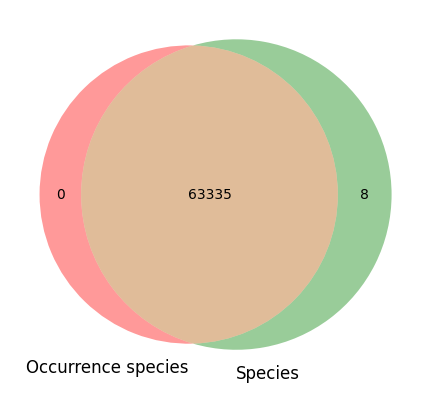

In [26]:
v = venn2((2, 3, 10), set_labels=[
    "Occurrence species",
    "Species"
])
v.get_label_by_id("10").set_text(len(no_species))
v.get_label_by_id("01").set_text(len(no_occurrence))
v.get_label_by_id("11").set_text(len(species_occurrence) - len(no_species))

## Extract list of species

We need the list of species (Species or below ranks: subspecies, variety, and form) from the dataset.

In [27]:
taxon_ranks = [
    "SPECIES", "SUBSPECIES", "VARIETY", "FORM"
]

Exploring entries of each rank:

In [28]:
species_species.groupby("taxonRank").size()

taxonRank
CLASS           113
FAMILY         1677
FORM            149
GENUS          8826
KINGDOM           3
ORDER           326
PHYLUM           40
SPECIES       43813
SUBSPECIES     1448
UNRANKED       4939
VARIETY        2009
dtype: int64

In [29]:
species_species = species_species[species_species["taxonRank"].isin(taxon_ranks)]
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
8,1020000,"Strongylosoma concolor Gervais, 1847",8740949,"Semnosoma concolor (Gervais, 1847)",1,SPECIES,SYNONYM,Animalia,1,Arthropoda,...,361,Polydesmida,1247,Dalodesmidae,4022,Semnosoma,1017679,Semnosoma concolor,8740949,NE
9,1030778,"Bathyleberis grossmani Kornicker, 1975",1030778,"Bathyleberis grossmani Kornicker, 1975",3,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,353,Myodocopida,1430,Cylindroleberididae,5674,Bathyleberis,1030775,Bathyleberis grossmani,1030778,NE
10,1139626,"Neohebestola humeralis (Blanchard, 1851)",1139626,"Neohebestola humeralis (Blanchard, 1851)",12,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Coleoptera,1470,Cerambycidae,5602,Neohebestola,1139614,Neohebestola humeralis,1139626,NE
12,1383858,"Bellerus rhianus (Walker, 1842)",1383858,"Bellerus rhianus (Walker, 1842)",1,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Hymenoptera,1457,Eulophidae,5505,Bellerus,1383855,Bellerus rhianus,1383858,NE
13,1419145,"Ctenoparia topali Smit, 1963",1419145,"Ctenoparia topali Smit, 1963",3,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Siphonaptera,1366,Hystrichopsyllidae,9010,Ctenoparia,1419141,Ctenoparia topali,1419145,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70509,10872494,Oropogon loxensis (Fée) Zukal,10872494,Oropogon loxensis (Fée) Zukal,5,SPECIES,ACCEPTED,Fungi,5,Ascomycota,...,180,Lecanorales,1048,Parmeliaceae,8305,Oropogon,2605068,Oropogon loxensis,10872494,NE
70511,11178264,"Doryssa charpentieri (Reeve, 1859)",11178264,"Doryssa charpentieri (Reeve, 1859)",1,SPECIES,ACCEPTED,Animalia,1,Mollusca,...,225,NaN,NaN,Pachychilidae,3244920,Doryssa,4608253,Doryssa charpentieri,11178264,NE
70520,12288284,"Tindaria sulcata (Gould, 1852)",7700358,"Nucula sulcata (Gould, 1852)",4,SPECIES,SYNONYM,Animalia,1,Mollusca,...,137,Nuculanida,9405932,Bathyspinulidae,4374777,Tindariopsis,4305288,Nucula sulcata,7700358,NE
70521,12291971,Ulota fuegiana subsp. darwinii (Mitt.) Malta,2671954,Ulota fuegiana Mitt.,19,SUBSPECIES,SYNONYM,Plantae,6,Bryophyta,...,327,Orthotrichales,1341,Orthotrichaceae,4668,Ulota,2671910,Ulota fuegiana,2671954,NaN


Extract the need checklist of species:

In [30]:
species_species[[
    "scientificName", "taxonRank", "taxonomicStatus"
]].to_csv("data/chilean_species.tsv", sep="\t", index=False, header=True)

<table>
    <tr>
        <td colspan="3" style="text-align: center;"><p>BIODATA - <a href="https://ieb-chile.cl/en/" target="_blank">Institute of Ecology and Biodiversity</a> © 2024</p></td>
    </tr>
</table>